<a href="https://colab.research.google.com/github/CatTechTacos/pythoncodes/blob/main/coursepurchaseproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

subasripv12_coursera_data_path = kagglehub.dataset_download('subasripv12/coursera-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coursera-data/course purchased details.csv


In this report we are going to understand the dataset of coursea relating to the courses being purchased and the time they spend on the website the number of courses they are taking and the exams they have started and finished also the time they have taken for clearing the exam using these data we will be training model with the aim to predict whether the students have upgraded to the paid version of the website or not.

The objective of this objective is to predict whether students would upgrade their free plan to paid one.

The objective that we are considering for this project is understanding the students and making changes in advertisement or the exclusive offers to get the tageted audience.According to the project is to aiming to increase the revenue of the comapny (coursera)

the problem in the dataset is that it deals with a heavy imbalanced dataset.

# importing the libeary

the library that are consideredd to be most important are to been imported.

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# reading the dataset

as the dataset we have got from a trusted website is a csv file we have to use the pd read csv in the variable called data

In [3]:
data = pd.read_csv('/content/course purchased details.csv')

# preprocessing

the preprocessing of dataset starts with removing null values and outliers but before that we have to check and analysie the dataset and check the number of rows and columns and the mean, max,min and the shape of the datset

# head is used to show the first 5 rows and the columns of the data set

In [4]:
data.head()

,LOCATION,Total_days_studied,Time_on_ site,courses_studying,practice_exams_workingon,practice_exams_passed,time_taken_for_exam,course_purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


# tail is used to check the last 5 rows and coumns

In [5]:
data.tail()

,LOCATION,Total_days_studied,Time_on_ site,courses_studying,practice_exams_workingon,practice_exams_passed,time_taken_for_exam,course_purchased
17756,EG,0,0.8,1,0,0,0.0,0
17757,IN,0,0.1,1,0,0,0.0,0
17758,CM,0,7.8,1,0,0,0.0,0
17759,CA,0,10.4,1,0,0,0.0,0
17760,SA,0,0.1,1,0,0,0.0,0


# shape is used to know the total number of rows and columns

In [6]:
data.shape

(17761, 8)

# describe is used to get the mean,max and min of the data

In [7]:
data.describe()

,Total_days_studied,Time_on_ site,courses_studying,practice_exams_workingon,practice_exams_passed,time_taken_for_exam,course_purchased
count,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000
mean,123.205112,31.082906,1.196442,0.277800,0.176341,1.242772,0.091830
std,90.675102,90.593660,0.646788,1.659998,1.099900,7.755386,0.288795
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,6.800000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,204.000000,34.300000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,5312.300000,16.000000,76.000000,63.000000,457.410000,1.000000


The main preprocessing starts from here

# finding null

In [8]:
data.isnull().sum()

,0
LOCATION,9
Total_days_studied,0
Time_on_ site,0
courses_studying,0
practice_exams_workingon,0
practice_exams_passed,0
time_taken_for_exam,0
course_purchased,0


as we can see that the dataset does contain any null values so we can move forword with duplicating the dataset so that while training the data set we donot make changes in the real dataset

In [9]:
data = data.copy()

# making the seaborn as default theme to use for the plot

the set method is used for setting the aesthestic styles for the subsequent plots its a method of seaborn and its used to style matplotlib the styles include darkgrid,whitegrid,dark,white,ticks.

In [10]:
sns.reset_orig()

# using kdeplot for generating the probabiltiy density curve

importing warning is used to remove the warnings that are formed while plotting the graphs as they are not errors they are not that much needed

In [11]:
import warnings
warnings.filterwarnings("ignore")

the following code is used to display 6 differnent gprahs

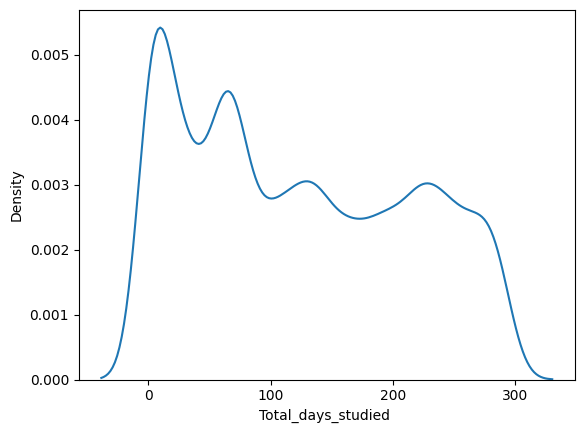

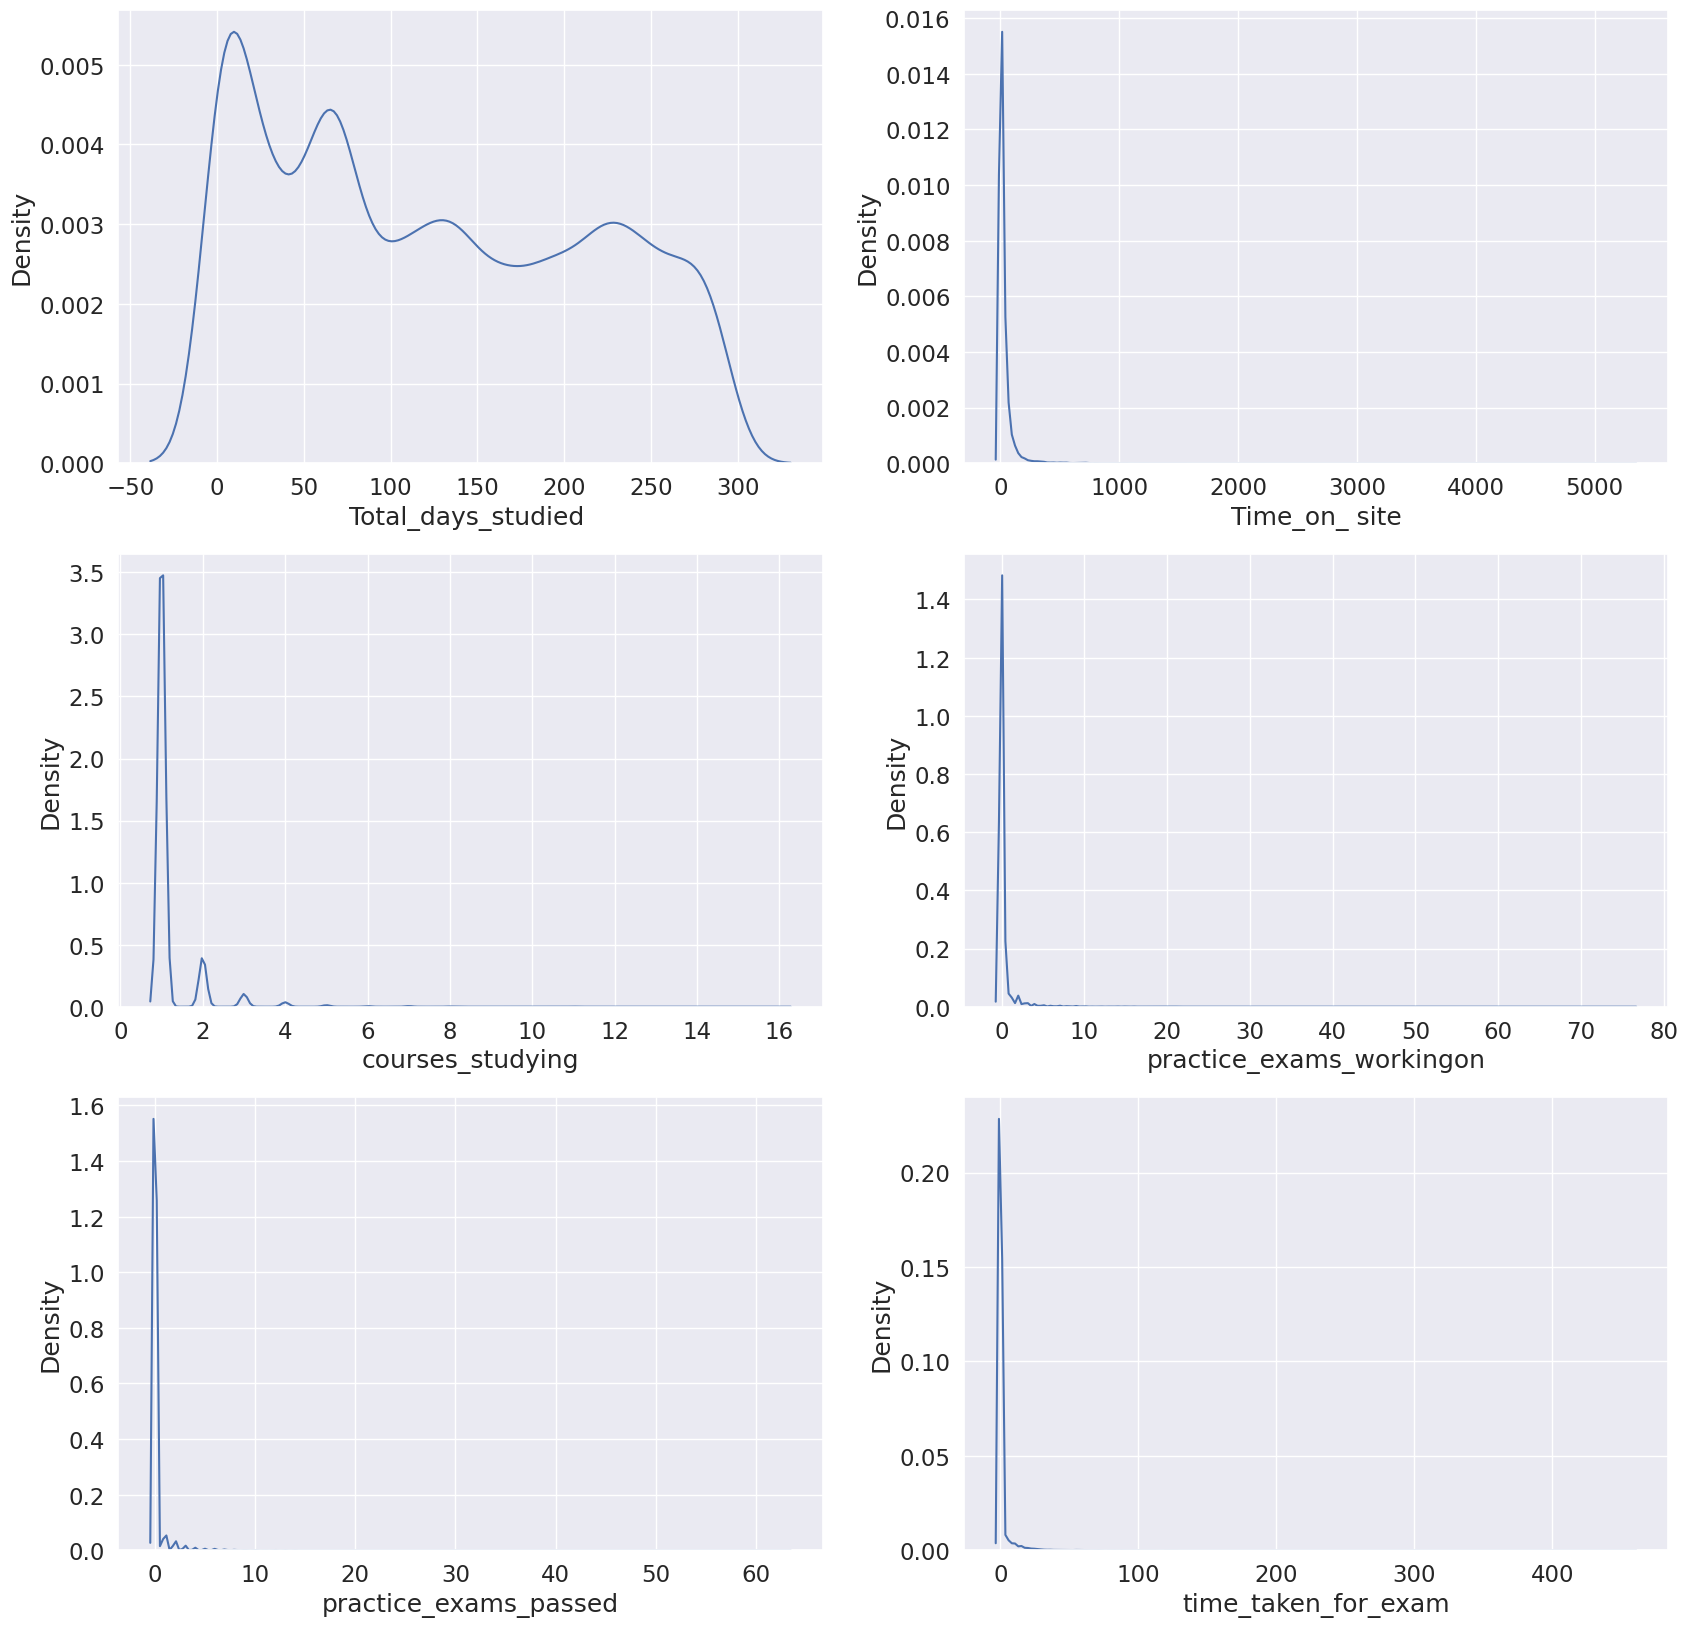

In [12]:
sns.kdeplot(data=data['Total_days_studied '])
sns.set(font_scale=1.5)
fig, axes = plt.subplots(3, 2, figsize=(20,20))
sns.kdeplot(data=data['Total_days_studied '], ax=axes[0,0])
sns.kdeplot(data=data['Time_on_ site'], ax=axes[0,1])
sns.kdeplot(data=data['courses_studying'], ax=axes[1,0])
sns.kdeplot(data=data['practice_exams_workingon'], ax=axes[1,1])
sns.kdeplot(data=data['practice_exams_passed'], ax=axes[2,0])
sns.kdeplot(data=data['time_taken_for_exam'], ax=axes[2,1]);

# removing the outliers

create a new dataframe to exclude all the outliers like adding boolean but we have to be careful that we only apply it to Time_on_site,courses_studying,practice_exams_workingon
and time_taken_for_exam

as Time_on_site is to be equal or less than 1000,courses_studying is to be equal or less than 10,pracite_exams_workingon equal to 10 or less,time_taken_for_exam less than 40 or equal to 40.

In [13]:
no_outliers = data[(data['Time_on_ site'] <= 1000)
                            & (data['courses_studying']<=10)
                            & (data['practice_exams_workingon']<=10)
                            & (data['time_taken_for_exam']<=40)]

as we cannot remove more than 5% of the data points so we have used this step or else the data will lead to inaccurate predictions

we are again plotting the graph as we have removed the outliers

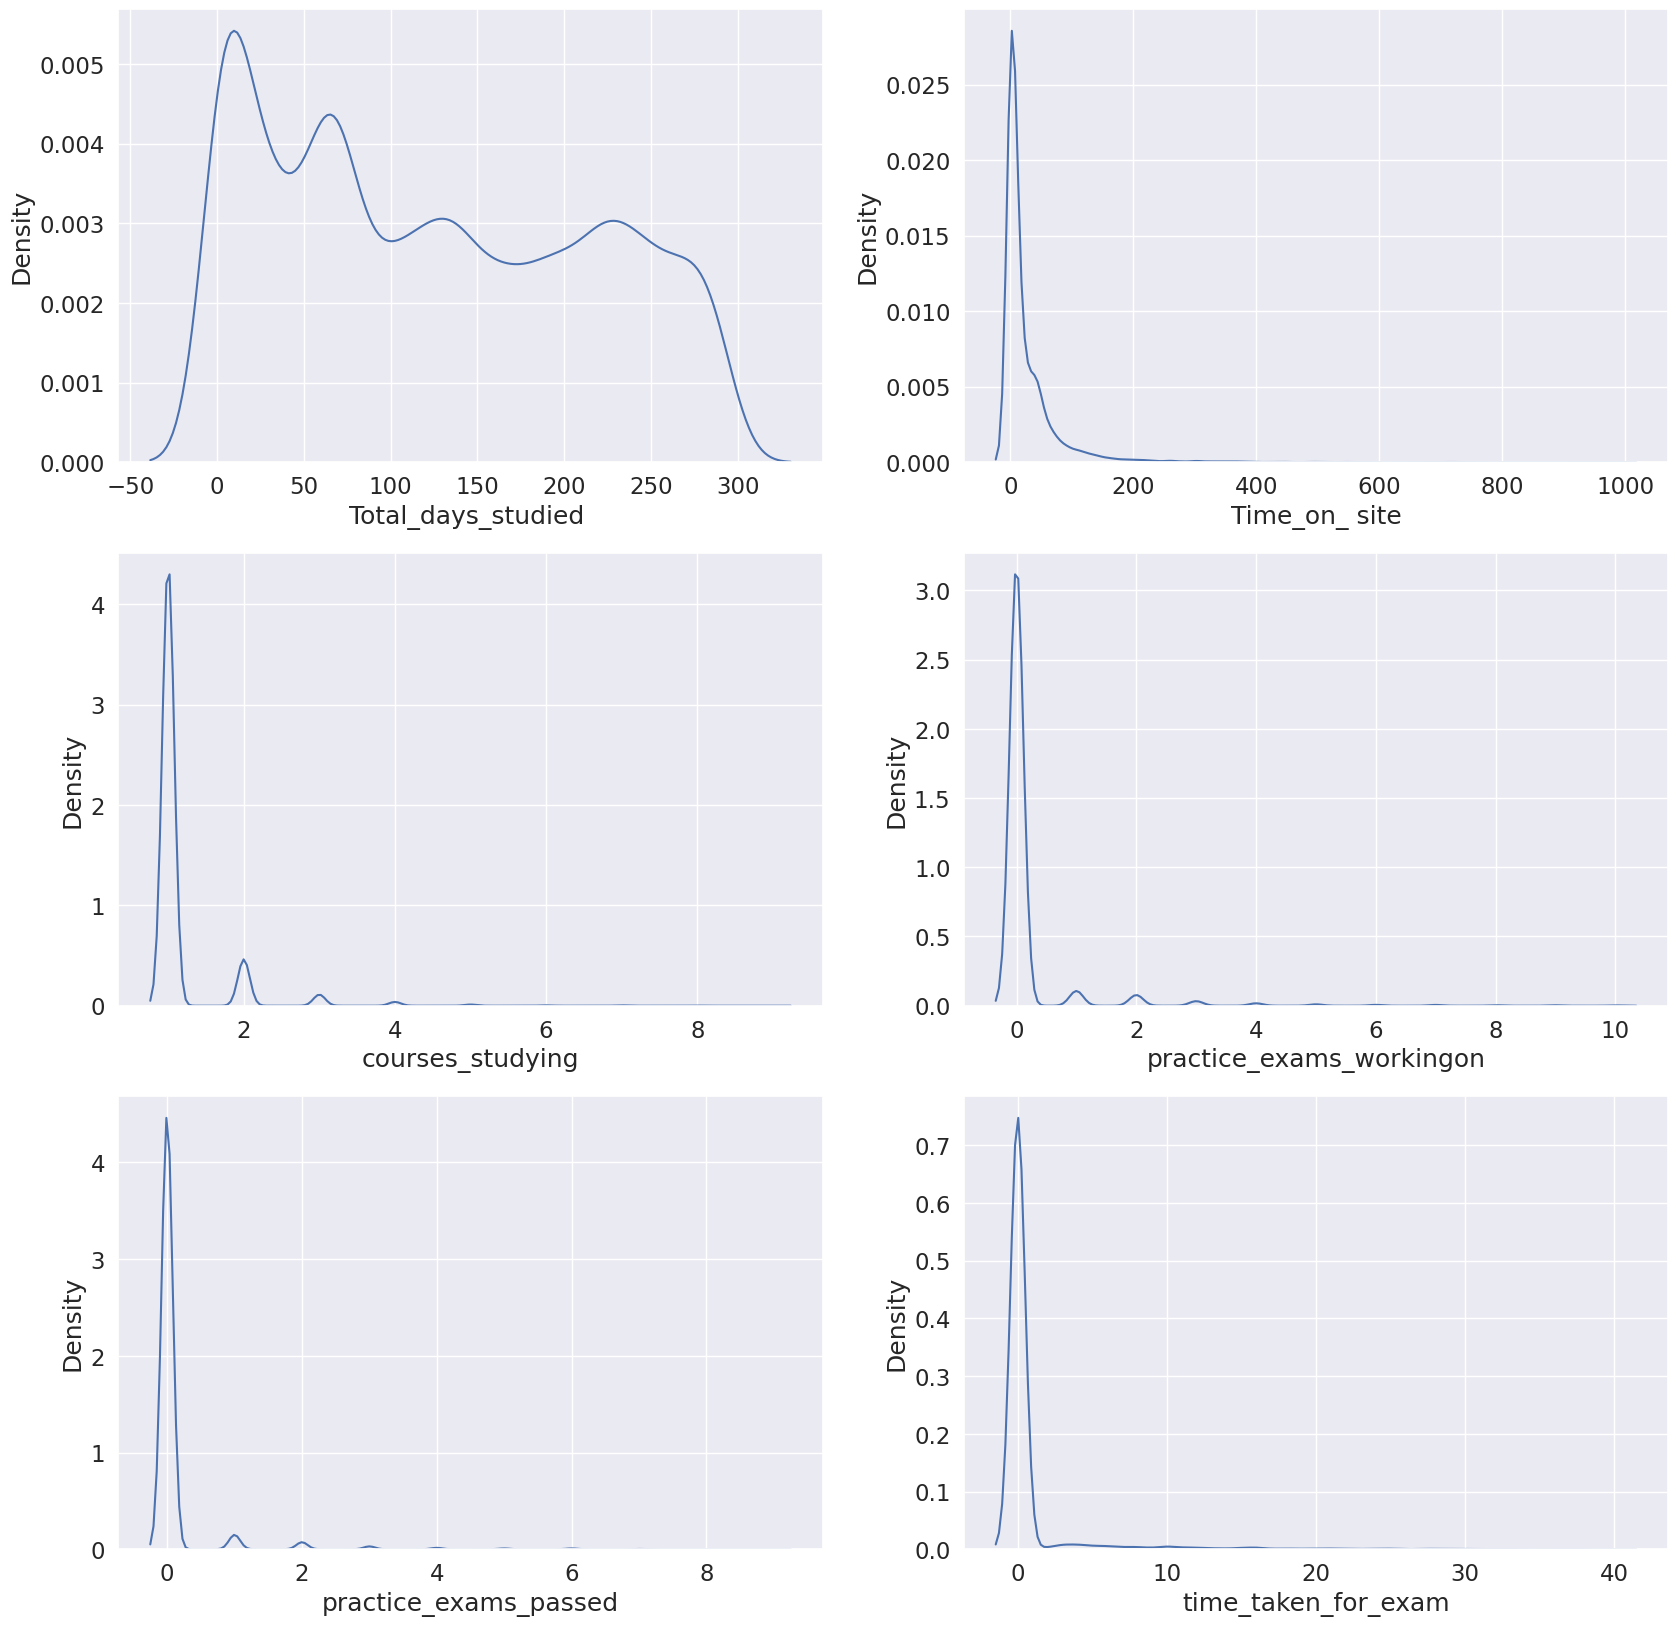

In [14]:

sns.reset_orig()


sns.set(font_scale=1.5)

fig, axes = plt.subplots(3, 2, figsize=(20,20))

sns.kdeplot(data=no_outliers['Total_days_studied '], ax=axes[0,0])
sns.kdeplot(data=no_outliers['Time_on_ site'], ax=axes[0,1])
sns.kdeplot(data=no_outliers['courses_studying'], ax=axes[1,0])
sns.kdeplot(data=no_outliers['practice_exams_workingon'], ax=axes[1,1])
sns.kdeplot(data=no_outliers['practice_exams_passed'], ax=axes[2,0])
sns.kdeplot(data=no_outliers['time_taken_for_exam'], ax=axes[2,1]);

# checking for multicollinearity

In [15]:
no_outliers.columns.to_numpy()

array(['LOCATION', 'Total_days_studied ', 'Time_on_ site',
       'courses_studying', 'practice_exams_workingon',
       'practice_exams_passed', 'time_taken_for_exam', 'course_purchased'],
      dtype=object)

checking multicollinearity  by selecting numerical features

In [16]:
var =no_outliers[['Total_days_studied ','Time_on_ site',
'courses_studying', 'practice_exams_workingon',
            'practice_exams_passed', 'time_taken_for_exam']]

creating vf dataframe to calculate variance inflation factor

In [17]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(var.to_numpy(), i) for i in range(var.shape[1])]
vif['features'] = var.columns
vif

,VIF,features
0,2.301237,Total_days_studied
1,1.788777,Time_on_ site
2,3.178713,courses_studying
3,10.201823,practice_exams_workingon
4,7.812546,practice_exams_passed
5,3.345478,time_taken_for_exam


now we are removing the highest vif that will result in removal of practice_exam_workingon

In [18]:
no_mult = no_outliers.drop('practice_exams_workingon', axis = 1)

In [19]:
no_mult.head()

,LOCATION,Total_days_studied,Time_on_ site,courses_studying,practice_exams_passed,time_taken_for_exam,course_purchased
0,US,288,358.1,1,2,15.81,0
1,SG,260,1.7,1,0,16.00,0
2,TR,260,22.4,1,0,0.93,0
3,KE,259,18.8,1,1,14.63,0
4,IN,259,118.0,2,1,16.48,0


In [20]:
var =no_outliers[['Total_days_studied ','Time_on_ site',
'courses_studying', 'practice_exams_workingon',
            'practice_exams_passed', 'time_taken_for_exam']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(var.to_numpy(), i) for i in range(var.shape[1])]
vif['features'] = var.columns
vif

,VIF,features
0,2.301237,Total_days_studied
1,1.788777,Time_on_ site
2,3.178713,courses_studying
3,10.201823,practice_exams_workingon
4,7.812546,practice_exams_passed
5,3.345478,time_taken_for_exam


checking for null values again

In [21]:
no_mult.isnull().sum()

,0
LOCATION,8
Total_days_studied,0
Time_on_ site,0
courses_studying,0
practice_exams_passed,0
time_taken_for_exam,0
course_purchased,0


we can see that the location still has few nulls to fill it we will use fillna

In [22]:
no_mult.loc[no_mult['LOCATION'].isna()]

,LOCATION,Total_days_studied,Time_on_ site,courses_studying,practice_exams_passed,time_taken_for_exam,course_purchased
311,NaN,88,58.1,1,2,11.20,1
337,NaN,86,43.0,1,2,12.96,0
556,NaN,121,241.9,2,3,21.29,0
806,NaN,64,86.4,1,2,4.98,0
1097,NaN,72,67.5,1,1,6.27,0
12363,NaN,84,6.2,1,0,0.00,0
12633,NaN,78,3.0,1,0,0.00,0
16946,NaN,11,8.2,1,0,0.00,0


In [23]:
no_null=no_mult.fillna('NM',axis=1)

In [24]:
no_mult.loc[no_mult['LOCATION'] == 'NM', 'LOCATION']

,LOCATION


In [25]:
no_null.isnull().sum()

,0
LOCATION,0
Total_days_studied,0
Time_on_ site,0
courses_studying,0
practice_exams_passed,0
time_taken_for_exam,0
course_purchased,0


# spliting the dataset

dd is the dataframe for dropping the course purchased

In [26]:
dd=no_null.drop(['course_purchased'],axis=1)

In [27]:
split=no_null['course_purchased']

as we have already imported train and test split we need to specify the input data,target,the proportion of the dataset to include in testing set,the decision to stratify the split.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(dd,split,test_size=0.2,random_state=365,stratify = split)

this will result in 4 values the training data,testing data,training labels and testing labels and the result has to be assigned in the variable

In [29]:
x_train.head()

,LOCATION,Total_days_studied,Time_on_ site,courses_studying,practice_exams_passed,time_taken_for_exam
5718,IN,218,1.6,2,0,0.0
3119,IN,263,75.5,1,0,0.0
5440,LK,222,44.4,1,0,0.0
11828,TR,97,2.6,1,0,0.0
8454,KR,162,1.0,1,0,0.0


# encoding the data

the encodeing process helps in encoding categorical data in location

In [30]:
en = OrdinalEncoder(handle_unknown = 'use_encoded_value',
                     unknown_value = 170);

In [31]:
x_train['LOCATION_enc'] = en.fit_transform(x_train['LOCATION'].to_numpy().reshape(-1, 1));

In [32]:
x_test['LOCATION_enc'] = en.transform(x_test['LOCATION'].to_numpy().reshape(-1, 1));

In [33]:
x_train = x_train.drop('LOCATION', axis = 1)
x_test = x_test.drop('LOCATION', axis = 1)

In [34]:
x_train_array = np.asarray(x_train, dtype = 'float')
y_train_array = np.asarray(y_train, dtype = 'int')

x_test_array = np.asarray(x_test, dtype = 'float')
y_test_array = np.asarray(y_test, dtype = 'int')

# logistic regression model

the independent variable will be x_train_array and the dependent variable will be y_train_array after asigning the taget and features to the function and the answer will be saved in log

In [35]:
log= sm.Logit(y_train_array, x_train_array)

fit function/method

In [36]:
res = log.fit()

Optimization terminated successfully.
         Current function value: 0.153143
         Iterations 10


In [37]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14094
Method:                           MLE   Df Model:                            5
Date:                Fri, 15 Nov 2024   Pseudo R-squ.:                  0.5019
Time:                        11:55:06   Log-Likelihood:                -2159.3
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0691      0.002    -31.915      0.000      -0.073      -0.065
x2             0.0144      0.001     19.992      0.000       0.013       0.016
x3            -0.2890      0.060     -4.791      0.000      -0.407      -0.171
x4             0.0839      0.076      1.102      0.271      -0.065       0.233
x5            -0.0670      0.015     -4.331      0.000      -0.097      -0.037
x6             0.0026      0.001      3.994      0.000       0.001       0.004
==============================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [38]:
y_test_reg = [round(res.predict(x_test_array)[i], 0)
                       for i in range(len(y_test_array))]

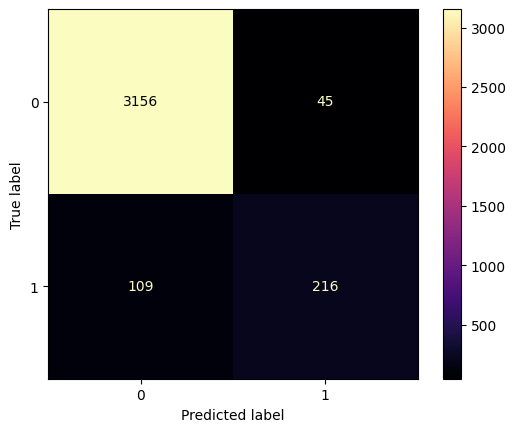

In [39]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test_array, y_test_reg,
    cmap = 'magma'
);
plt.show()

# k nearest neighbors model

In [40]:
knn = {'n_neighbors':range(1, 51),
                  'weights':['uniform', 'distance']}

In [41]:
grid = GridSearchCV(estimator = KNeighborsClassifier(),
                               param_grid =knn,
                               scoring = 'accuracy')

In [42]:
grid .fit(x_train_array, y_train_array)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [43]:
clf =grid .best_estimator_
clf

KNeighborsClassifier(n_neighbors=7)

In [44]:
y_test_pred_knn = clf.predict(x_test_array)

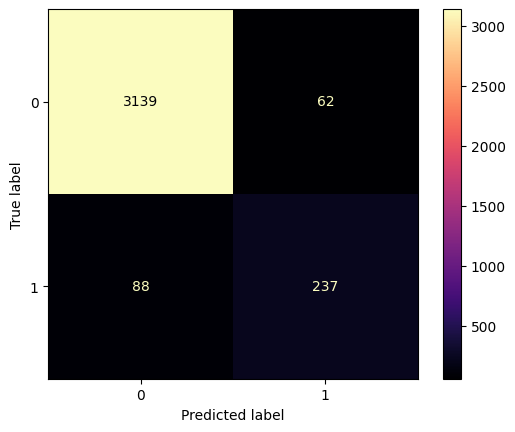

In [45]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test_array, y_test_pred_knn,
    labels = clf.classes_,
    cmap = 'magma'
);
plt.show()

In [46]:
print(classification_report(y_test_array,
                            y_test_pred_knn,
                            target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.79      0.73      0.76       325

    accuracy                           0.96      3526
   macro avg       0.88      0.85      0.87      3526
weighted avg       0.96      0.96      0.96      3526



# support vector machines model

In [47]:
scale=MinMaxScaler(feature_range=(-1,1))

In [48]:
x_train= scale.fit_transform(x_train_array)

In [49]:
x_test = scale.transform(x_test_array)

In [50]:
svc = {'kernel':['linear', 'poly', 'rbf'],'C':range(1, 11),'gamma': ['scale', 'auto']}

In [51]:
grid_sc = GridSearchCV(estimator = SVC(),
                               param_grid = svc,
                               scoring = 'accuracy')

In [52]:
grid_sc.fit(x_train,y_train_array)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 11), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [53]:
clf = grid_sc.best_estimator_
clf

SVC(C=8, kernel='poly')

In [54]:
y_test_pred_svc= clf.predict(x_test)

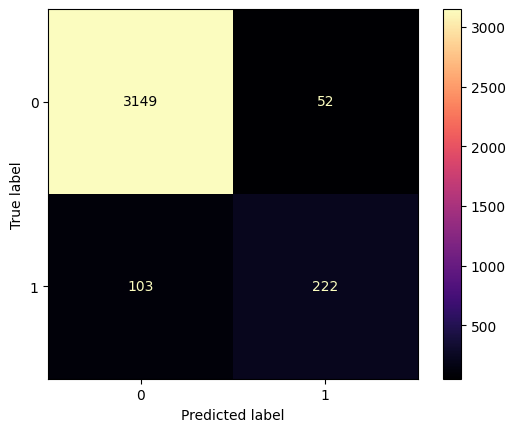

In [55]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test_array, y_test_pred_svc,
    labels = clf.classes_,
    cmap = 'magma'
);
plt.show()

In [ ]:
print(classification_report(y_test_array,
                            y_test_pred_svc,
                            target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.81      0.68      0.74       325

    accuracy                           0.96      3526
   macro avg       0.89      0.83      0.86      3526
weighted avg       0.95      0.96      0.95      3526



# decision tree

In [ ]:
dt = {'ccp_alpha':[0,0.001,0.002,0.003,0.004,0.005]}

In [ ]:
grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 365),
                              param_grid = dt,
                              scoring = 'accuracy')

In [ ]:
grid_dt.fit(x_train_array,y_train_array)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=365),
             param_grid={'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]},
             scoring='accuracy')

In [ ]:
dt_clf = grid_dt.best_estimator_

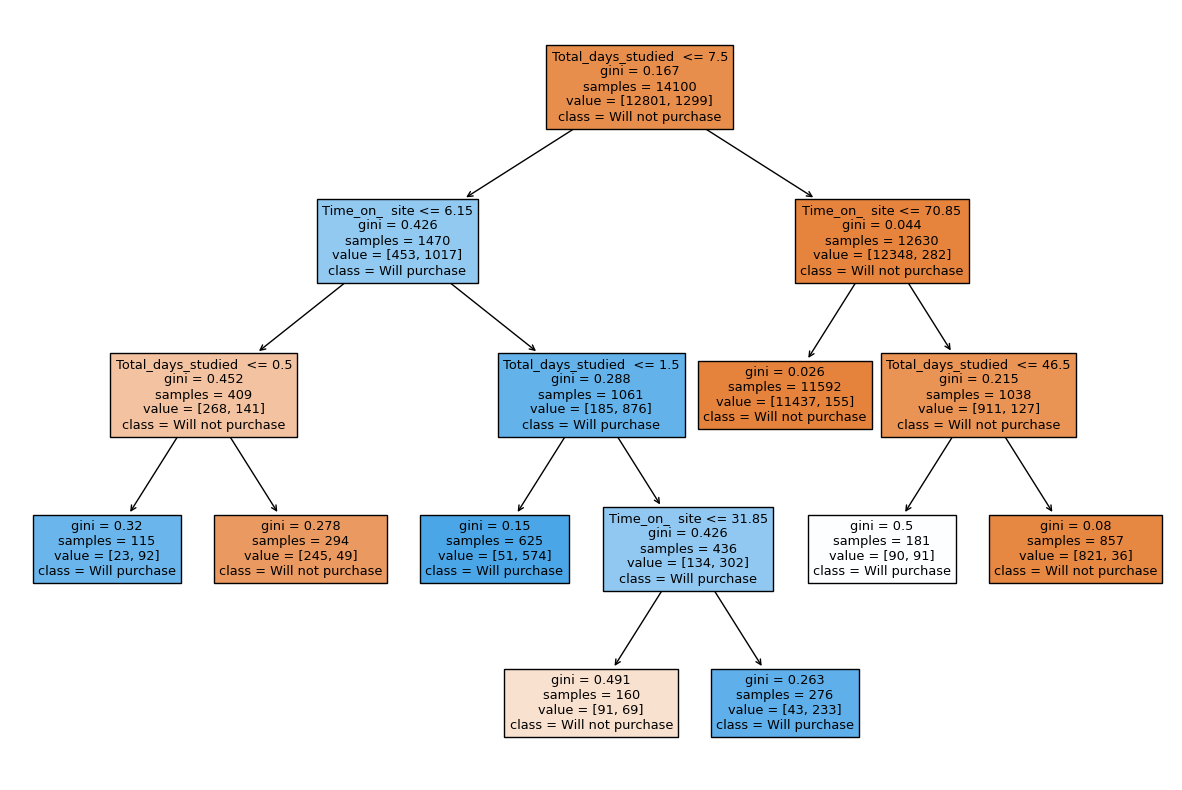

In [ ]:
plt.figure(figsize=(15,10))

plot_tree(dt_clf,
          filled=True,
          feature_names = ['Total_days_studied ',
                           'Time_on_  site',
                           'courses_studying',
                           'Practice exams passed',
                           'time_taken_for_exam',
                           'LOCATION'],
          class_names = ['Will not purchase',
                         'Will purchase'])

plt.show()

In [ ]:
y_test_pred_dt = dt_clf.predict(x_test_array)

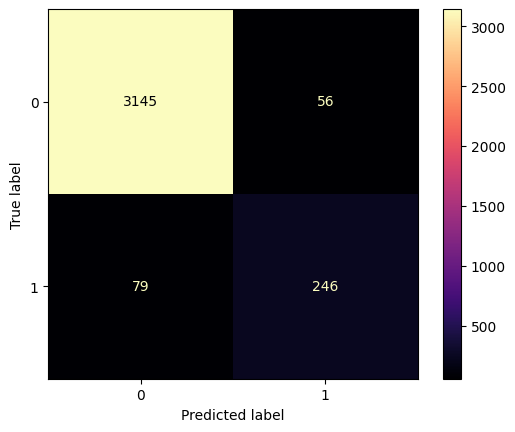

In [ ]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test_array, y_test_pred_dt,
    labels = dt_clf.classes_,
    cmap = 'magma'
);
plt.show()

In [ ]:
print(classification_report(y_test_array, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3201
           1       0.81      0.76      0.78       325

    accuracy                           0.96      3526
   macro avg       0.90      0.87      0.88      3526
weighted avg       0.96      0.96      0.96      3526



# random forest model

In [ ]:
rf= RandomForestClassifier(ccp_alpha = 0.0001)

In [ ]:
rf.fit(x_train_array, y_train_array)

RandomForestClassifier(ccp_alpha=0.0001)

In [ ]:
y_test_pred_rf = rf.predict(x_test_array)

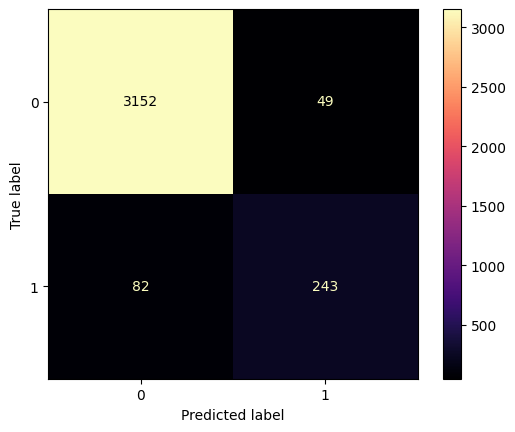

In [ ]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test_array, y_test_pred_rf,
    labels = rf.classes_,
    cmap = 'magma'
);
plt.show()

In [ ]:
print(classification_report(y_test_array, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.83      0.75      0.79       325

    accuracy                           0.96      3526
   macro avg       0.90      0.87      0.88      3526
weighted avg       0.96      0.96      0.96      3526

